In [1]:
#Import important packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized

In [2]:
#Open the file with the psf

path = '/home/carlos/Desktop/SDP/Dynamics/HST Data Reduction/Data/' #Caminho da imagem
file = path+'psf.fits'
hdu = fits.open(file) #Abrindo imagem
img = hdu[0].data #Pega os dados da img
img_data = hdu[0].data #Pega os dados da img

where_are_NaNs = np.isnan(img)
img[where_are_NaNs] = 0

In [3]:
#Proporties of the image

minlevel = 0.01  #counts/px
scale = 0.09      #arcsec/px


 Pixels used: 159
 Peak Img[j, k]: 11 11
 Mean (j, k): 11.02 10.97
 Theta (deg): 60.8
 Astro PA (deg): 29.2
 Eps: 0.044
 Major axis (pix): 8.0


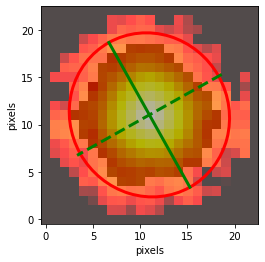

In [4]:
    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
plt.clf()
f = find_galaxy(img, fraction=0.3, plot=1)
plt.show()  # Allow plot to appear on the screen

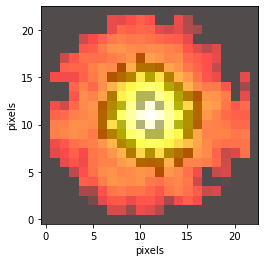

In [5]:
    # Perform psf photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=minlevel, plot=1)
plt.show()  # Allow plot to appear on the screen

Iteration: 1  chi2: 0.1759  Nonzero: 6/15
Iteration: 11  chi2: 0.1504  Nonzero: 5/15
Nonzero Gaussians: 4/15
Eliminating not useful Gaussians...
ngauss: 3           chi2: 0.151
Starting nonlinear fit...
Iteration: 1  chi2: 0.1511  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.27 seconds
  Total Iterations:  17
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  69
 Chi2: 0.15 
 STDEV: 0.04657 
 MEANABSDEV: 0.02781 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      1.11599     0.683073     0.939904
      5.85138      1.62723     0.971398
      3.34645      3.04138     0.939337
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.0000 1.0000
############################################
Iteration: 1  chi2: 0.1759  Nonzer

Nonzero Gaussians: 4/15
Eliminating not useful Gaussians...
ngauss: 3           chi2: 0.151
Starting nonlinear fit...
Iteration: 1  chi2: 0.1511  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.27 seconds
  Total Iterations:  17
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  69
 Chi2: 0.15 
 STDEV: 0.04657 
 MEANABSDEV: 0.02781 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      1.11599     0.683073     0.939904
      5.85138      1.62723     0.971398
      3.34645      3.04138     0.939337
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.4500 1.0000
############################################
Iteration: 1  chi2: 0.1759  Nonzero: 6/15
Iteration: 11  chi2: 0.1504  Nonzero: 5/15
Nonzero Gaussians: 4/15
Eliminatin

Nonzero Gaussians: 4/15
Eliminating not useful Gaussians...
ngauss: 3           chi2: 0.151
Starting nonlinear fit...
Iteration: 1  chi2: 0.1511  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.27 seconds
  Total Iterations:  17
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  69
 Chi2: 0.15 
 STDEV: 0.04657 
 MEANABSDEV: 0.02781 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      1.11599     0.683073     0.939904
      5.85138      1.62723     0.971398
      3.34645      3.04138     0.939337
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.9000 1.0000
############################################
Iteration: 1  chi2: 0.1759  Nonzero: 6/15
Nonzero Gaussians: 5/15
Eliminating not useful Gaussians...
ngauss: 4        

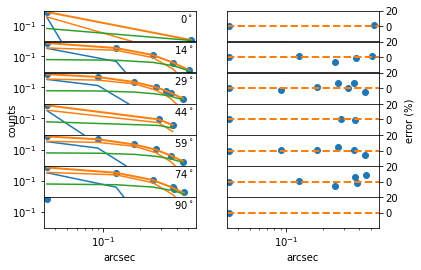

In [6]:
 # Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************

plt.clf()
m = mge_fit_sectors_regularized(s.radius, s.angle, s.counts, f.eps,
                        scale=scale, plot=1, bulge_disk=0, linear=0)
plt.show()  # Allow plot to appear on the screen

In [7]:
#Assume a circular PSF
m.sol[2][:] = 1.0   #Only for PSF_model

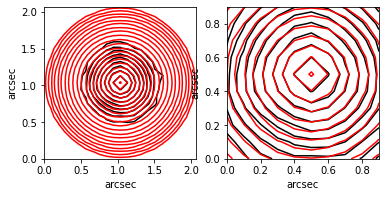

In [8]:
  # Show contour plots of the results
plt.clf()
plt.subplot(121)
ctc, model = mge_print_contours(img.clip(minlevel), f.theta, f.xpeak, f.ypeak, m.sol, scale=scale,
                       )

    # Extract the central part of the image to plot at high resolution.
    # The MGE is centered to fractional pixel accuracy to ease visual comparson.

n = 5
img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
mge_print_contours(img, f.theta, xc, yc, m.sol,
                      scale=scale)
plt.show()  # Allow plot to appear on the screen



In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

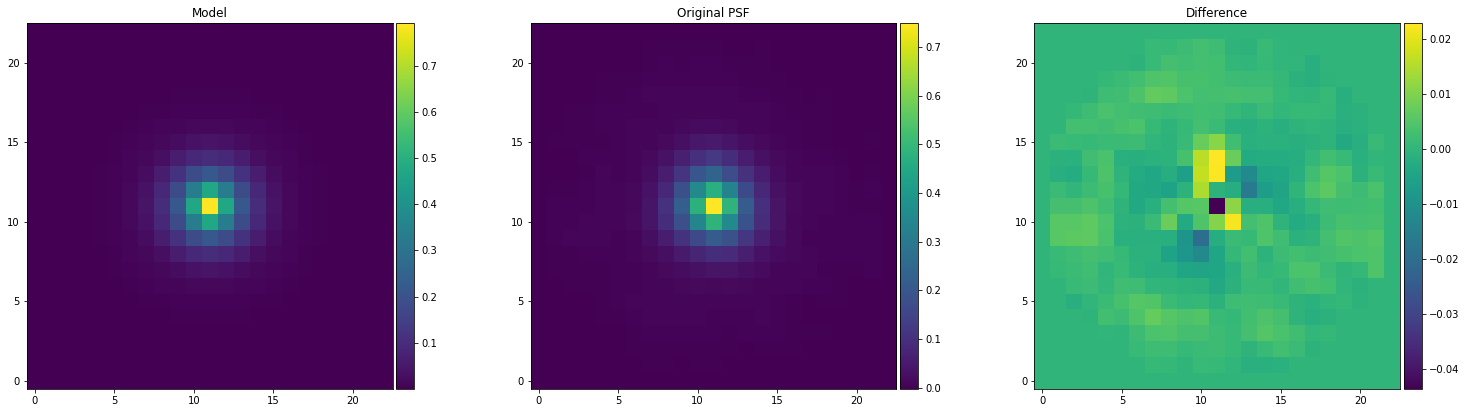

In [10]:
fig, axes = plt.subplots(1,3, figsize=(25, 7))
plt.subplots_adjust(hspace=0.0, wspace=0.3)


model_plt = axes[0].imshow(model, origin='lower', vmin=model.min(),  vmax=model.max())
axes[0].set_title("Model")

divider = make_axes_locatable(axes=axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(model_plt, ax=axes[0], cax=cax)

origial_plt = axes[1].imshow(img_data, origin='lower', vmin=img_data.min(),  vmax=img_data.max())
axes[1].set_title("Original PSF")

divider = make_axes_locatable(axes=axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(origial_plt, ax=axes[1], cax=cax)

diff_plt = axes[2].imshow(img_data - model, origin='lower')
axes[2].set_title("Difference")

divider = make_axes_locatable(axes=axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(diff_plt, ax=axes[2], cax=cax)


plt.savefig("/home/carlos/Desktop/SDP/Dynamics/HST Data Reduction/Figs/PSF-Models.png", fmt="png")

In [65]:
fits.writeto(filename=path+"psf_model.fits", data=model)
fits.writeto(filename=path+"difference.fits", data=(img_data - model))

In [13]:
norm_intensity = m.sol[0]/m.sol[0].sum()

#Save table with psf model values

np.savetxt("Psf_model.txt", np.column_stack([norm_intensity, m.sol[1]]),
               header="Normalized I[counts] \t Sigma[counts]",fmt="%.10f \t\t\t %.10f" )